In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import time

**Подготовка данных**

In [2]:
indicators_file = 'C:\\Users\\Ekaterina\\Desktop\\ДИПЛОМ\\Показатели.xlsx'

In [3]:
indi_df_my = pd.read_excel(indicators_file).set_index('Показатели')
indi_df_my

,Владение HTML,Владение CSS,Наличие портфолио,Знание JavaScript,Знание Jquery,Навыки работы в Pixel Perfect,Знание препроцессоров,Желание учиться и развиваться в ИТ,Знание C++,Навык работы в Linux,...,знание продуктов 1С,Обучаемость,Знания современных операционных систем Windows,Любовь к играм,Креативность,Хорошее знание графических редакторов,знание Adobe Illustrator,знание Adobe Photoshop,Умение пользоваться Figma,Понимание основных трендов в веб-дизайне
Показатели,,,,,,,,,,,,,,,,,,,,,
Владение HTML,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Владение CSS,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Наличие портфолио,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
Знание JavaScript,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Знание Jquery,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хорошее знание графических редакторов,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
знание Adobe Illustrator,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
знание Adobe Photoshop,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0


In [4]:
indi_df_vn = pd.read_excel(indicators_file, sheet_name='Лист2').set_index('Показатели')
indi_df_vn

,Владение HTML,Владение CSS,Наличие портфолио,Знание JavaScript,Знание Jquery,Навыки работы в Pixel Perfect,Знание препроцессоров,Желание учиться и развиваться в ИТ,Знание C++,Навык работы в Linux,...,знание продуктов 1С,Обучаемость,Знания современных операционных систем Windows,Любовь к играм,Креативность,Хорошее знание графических редакторов,знание Adobe Illustrator,знание Adobe Photoshop,Умение пользоваться Figma,Понимание основных трендов в веб-дизайне
Показатели,,,,,,,,,,,,,,,,,,,,,
Владение HTML,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Владение CSS,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
Наличие портфолио,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
Знание JavaScript,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Знание Jquery,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хорошее знание графических редакторов,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
знание Adobe Illustrator,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
знание Adobe Photoshop,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0


In [5]:
# конвертация в матрицу
indi_mt_my = np.matrix(indi_df_my)
indi_mt_vn = np.matrix(indi_df_vn)

In [6]:
c = np.ones((112, 112))

def gen(indi_mt, p):
    '''размножение с шумом'''
    # генерация шумов (100 * p)%
    a = np.random.choice([0, 1], size=indi_mt.shape, p=[1 - p, p])
    # зашумление данных
    indi = np.where(a, np.abs(indi_mt - 1), indi_mt)
    # преобразование в симметрическую с единичной диагональю
    indi = np.where(np.triu(c, k=1), indi, 0)
    indi = indi + indi.T + np.eye(indi.shape[0])
    return indi

In [7]:
# количество матриц из одной
N = 5
# доля шума
P = 0.1

In [48]:
indi_list = []
res = np.zeros_like(indi_mt_my)

for _ in range(7):    
    indi = gen(indi_mt_my, 0.2)
    indi_list.append(indi)
    res = res + indi
for _ in range(5):    
    indi = gen(indi_mt_vn, P)
    indi_list.append(indi)
    res = res + indi

In [9]:
mtr = indi_list[0]
mtr    

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
def mtr_to_df(mtr):
    return pd.DataFrame(mtr, dtype=int, columns=indi_df_my.columns, index=indi_df_my.columns)

In [11]:
import xlsxwriter

In [54]:
df_dict = dict()
for i, mtr in enumerate(indi_list):
    df = mtr_to_df(mtr)
    df_dict['Лист' + str(i + 1)] = df
writer = pd.ExcelWriter('./indicators2.xlsx', engine='xlsxwriter')
for sheet_name in df_dict.keys():
    df_dict[sheet_name].to_excel(writer, sheet_name=sheet_name)
writer.save()

In [49]:
# итоговые вероятности
p = res/(2 * N)

**Кластеризация**

In [50]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(p, method='complete')

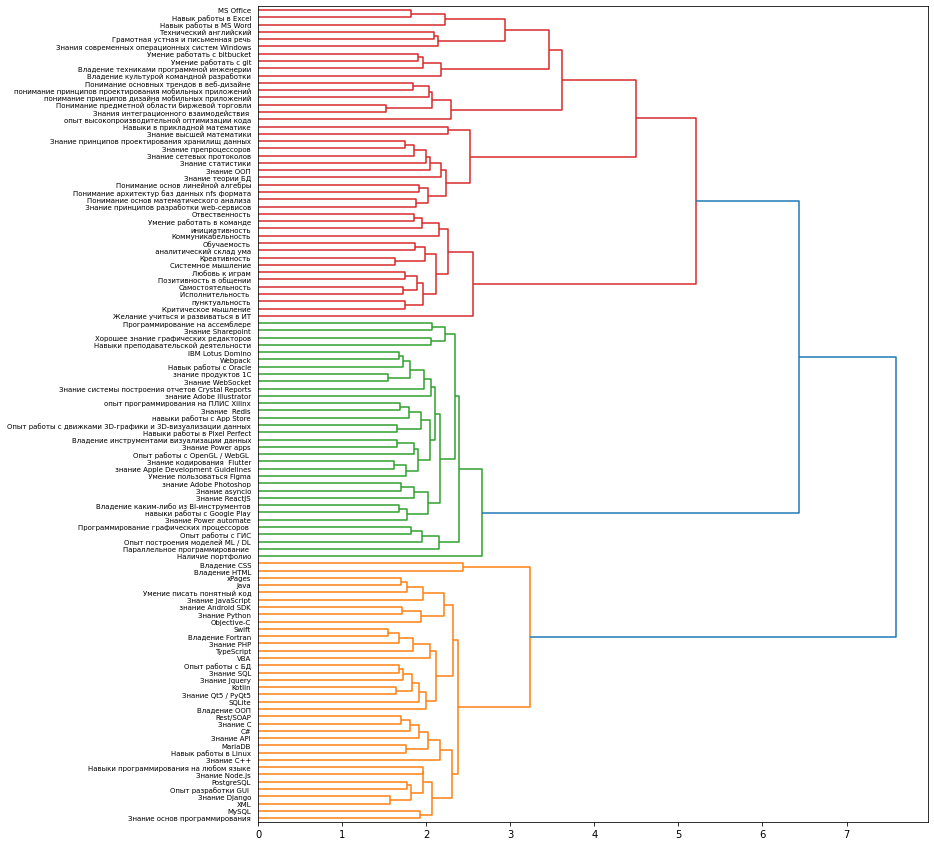

In [51]:
# Строим дендрограмму
plt.figure(figsize=(12, 15))
dendrogram(mergings,
           truncate_mode='level',
           leaf_font_size=7,
           orientation = 'right',
           labels=indi_df_my.columns
           )
plt.savefig("Hierarchy.png")
plt.show()

In [52]:
# максимальная дистанция между кластерами
D = 3.4
assignments = fcluster(mergings, D, 'distance')
# количество кластеров (можно подобрать, изменяя D)
C = len(np.unique(np.array(assignments)))
C

7

In [53]:
# группировка
groups = [[] for _ in range(C)]
for i in range(112):
    groups[assignments[i] - 1].append(indi_df_my.columns[i])

# эти группы идут в метод Дельфи
groups

[['Владение HTML',
  'Владение CSS',
  'Знание JavaScript',
  'Знание Jquery',
  'Знание C++',
  'Навык работы в Linux',
  'Знание PHP',
  'Знание Node.js',
  'Знание С',
  'VBA',
  'XML',
  'TypeScript',
  'Опыт разработки GUI ',
  'Владение ООП',
  'Умение писать понятный код',
  'Знание Python',
  'Знание Qt5 / PyQt5',
  'Знание SQL',
  'Знание основ программирования',
  'Навыки программирования на любом языке',
  'Знание Django',
  'MariaDB',
  'MySQL',
  'Java',
  'xPages',
  'Опыт работы с БД',
  'Владение Fortran',
  '\xa0знание Android SDK',
  'Kotlin',
  'Rest/SOAP',
  'Знание API',
  'SQLite',
  'Objective-C',
  'C#',
  'Swift',
  'PostgreSQL'],
 ['Наличие портфолио',
  'Навыки работы в Pixel Perfect',
  'Навык работы с Oracle',
  'Знание системы построения отчетов Crystal Reports',
  'Опыт работы с ГИС',
  'Опыт работы с OpenGL / WebGL ',
  'Опыт работы с движками 3D-графики и 3D-визуализации данных',
  'Навыки преподавательской деятельности',
  'Знание Sharepoint',
  'Знани